In [10]:
import numpy
import tensorflow as tf
from tensorflow import keras
from keras.constraints import maxnorm
from keras.utils import np_utils

In [11]:
seed = 21

In [12]:
from keras.datasets import cifar10

In [13]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [14]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [15]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [16]:
model = keras.Sequential()

In [17]:
model.add(keras.layers.Conv2D(32, 3, input_shape=(32, 32, 3), activation='relu', padding='same'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(64, 3, padding='same', activation='relu'))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())
    
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Flatten())
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dense(class_num, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_6 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_5 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 64)       

In [18]:

numpy.random.seed(seed)
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25, batch_size=64)

Epoch 1/25
782/782 [==============================] - 72s 91ms/step - loss: 1.5160 - accuracy: 0.4599 - val_loss: 1.2666 - val_accuracy: 0.5510
Epoch 2/25
782/782 [==============================] - 76s 97ms/step - loss: 1.1144 - accuracy: 0.6101 - val_loss: 0.8648 - val_accuracy: 0.6971
Epoch 3/25
782/782 [==============================] - 78s 99ms/step - loss: 0.9649 - accuracy: 0.6648 - val_loss: 0.7810 - val_accuracy: 0.7264
Epoch 4/25
782/782 [==============================] - 83s 106ms/step - loss: 0.8722 - accuracy: 0.7007 - val_loss: 0.7159 - val_accuracy: 0.7474
Epoch 5/25
782/782 [==============================] - 78s 99ms/step - loss: 0.8118 - accuracy: 0.7194 - val_loss: 0.7117 - val_accuracy: 0.7527
Epoch 6/25
782/782 [==============================] - 77s 98ms/step - loss: 0.7670 - accuracy: 0.7359 - val_loss: 0.6950 - val_accuracy: 0.7564
Epoch 7/25
782/782 [==============================] - 74s 94ms/step - loss: 0.7234 - accuracy: 0.7514 - val_loss: 0.7213 - val_accuracy

In [19]:
model.evaluate(X_test, y_test, verbose=0)

[0.5191178917884827, 0.8274999856948853]

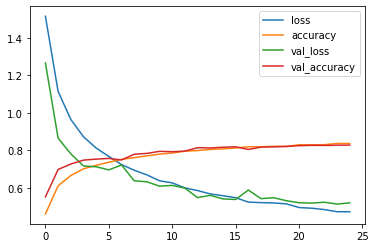

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot()
plt.show()